 Time Series data analysis on the data international Airline passenger from 1940 to 1960

In [2]:



import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
df = pd.read_csv(url)
df

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [4]:
df.shape


(144, 2)

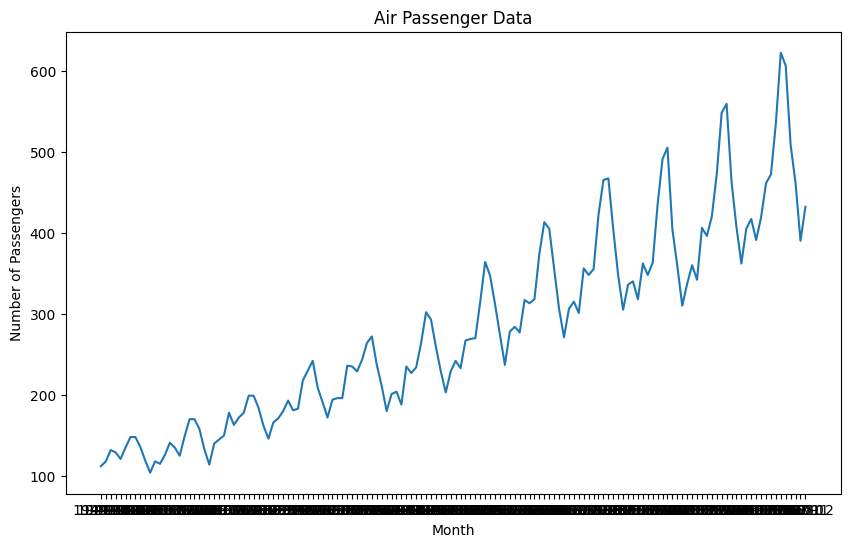

In [5]:
plt.figure(figsize=(10,6))
plt.plot(df['Month'], df['Passengers'])
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.title("Air Passenger Data")
plt.show()



<Axes: xlabel='Month', ylabel='Passengers'>

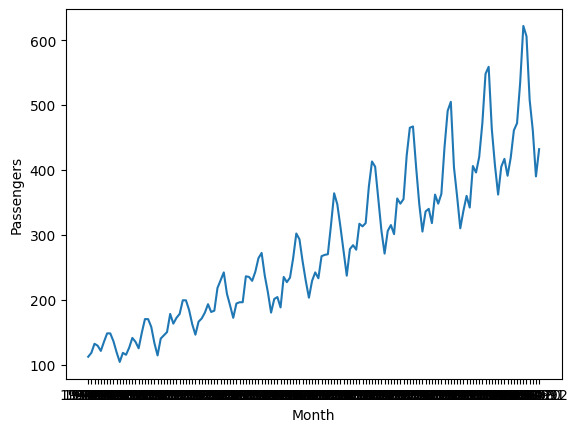

In [6]:
sns.lineplot(x="Month",y="Passengers",data=df)

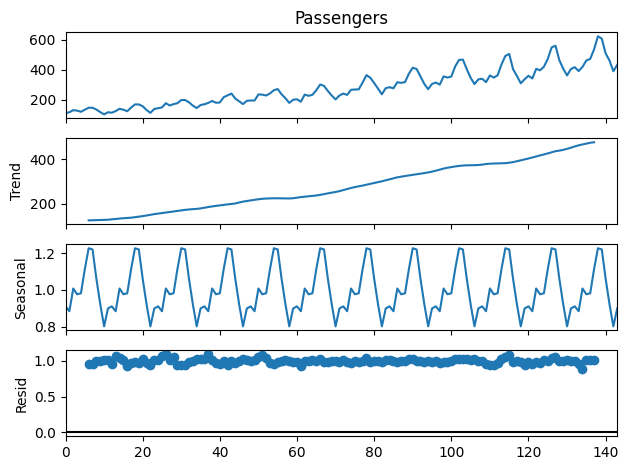

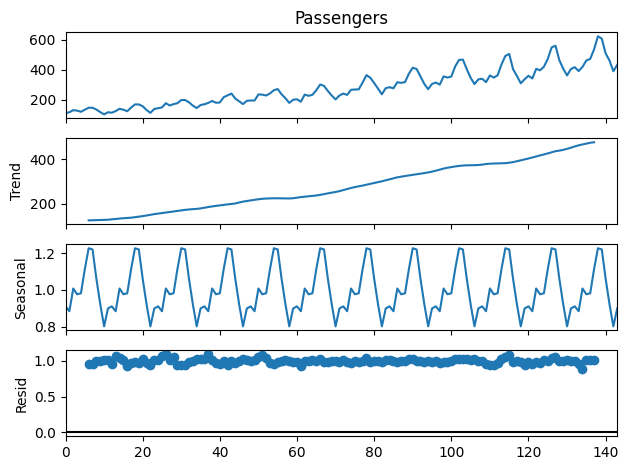

In [7]:
decompose=seasonal_decompose(df['Passengers'] ,model="multiplicatve",period=12)
decompose.plot()

<Axes: >

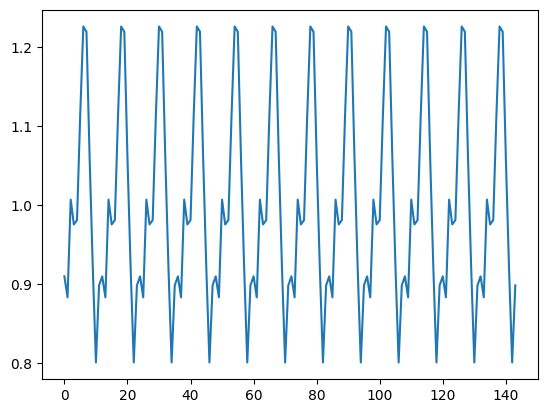

In [8]:
decompose.seasonal.plot()

In [9]:
trend=decompose.trend
seasonal=decompose.seasonal
residule= decompose.resid

In [10]:
%pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


Epoch 1/100


c:\code\Data_Science_Projects\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 99580.0859 - root_mean_squared_error: 315.5631   
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 51429.6797 - root_mean_squared_error: 226.7811 
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 22052.6426 - root_mean_squared_error: 148.5013 
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8446.4482 - root_mean_squared_error: 91.9046 
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3506.8477 - root_mean_squared_error: 59.2186 
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2152.3154 - root_mean_squared_error: 46.3931 
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1931.1870 - root_mean_squared_error: 43.9453 
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1923.7007 - root_mean_squared_error: 43.8600 
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1846.0951 - root_mean_squared_error: 42.9662 
Epoch 10/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss:

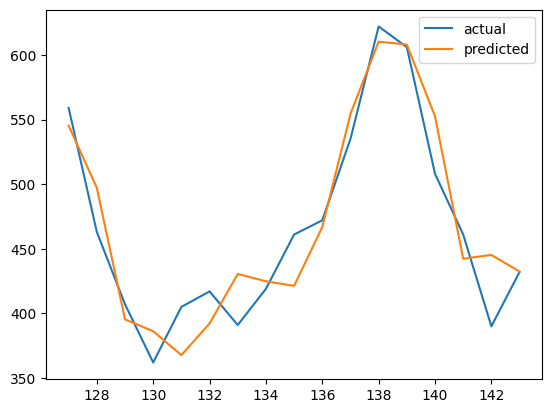

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.metrics import RootMeanSquaredError


# split the data into training and testing sets
train_size = int(len(df) * 0.8)
train = df[:train_size]
test = df[train_size:]

# define the number of lagged time steps to use as input features
n_lags = 12

# create the input and output data for the neural network
X_train = np.array([train["Passengers"].values[i:i+n_lags] for i in range(len(train)-n_lags)])
y_train = np.array(train["Passengers"].values[n_lags:])
X_test = np.array([test["Passengers"].values[i:i+n_lags] for i in range(len(test)-n_lags)])
y_test = np.array(test["Passengers"].values[n_lags:])

# create the neural network model
model = Sequential()
model.add(Dense(10, input_dim=n_lags, activation="relu"))
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer="adam", metrics=[RootMeanSquaredError()])

# train the neural network model
model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=1)

# make predictions on the testing set using the trained model
predictions = model.predict(X_test)

# plot the actual and predicted values
plt.plot(test.index[-len(predictions):], test["Passengers"].values[-len(predictions):], label="actual")
plt.plot(test.index[-len(predictions):], predictions, label="predicted")
plt.legend()
plt.show()